In [ ]:
!pip install super-gradients
# !pip install git+https://github.com/Deci-AI/super-gradients.git@feature/SG-1060-yolo-nas-pose

  Cloning https://github.com/Deci-AI/super-gradients.git (to revision feature/SG-1060-yolo-nas-pose) to /tmp/pip-req-build-_noryag2
  Running command git clone --filter=blob:none --quiet https://github.com/Deci-AI/super-gradients.git /tmp/pip-req-build-_noryag2
  Running command git checkout -b feature/SG-1060-yolo-nas-pose --track origin/feature/SG-1060-yolo-nas-pose
  Switched to a new branch 'feature/SG-1060-yolo-nas-pose'
  Branch 'feature/SG-1060-yolo-nas-pose' set up to track remote branch 'feature/SG-1060-yolo-nas-pose' from 'origin'.
  Resolved https://github.com/Deci-AI/super-gradients.git to commit aabb40d2da7ee832bbb3d5e71481a309b2f31a6c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  

In [ ]:
import torch
import os
import pathlib

from super_gradients.training import models
from super_gradients.common.object_names import Models

The console stream is logged into /root/sg_logs/console.log


[2023-11-06 09:52:35] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-11-06 09:52:35] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-11-06 09:52:35] INFO - utils.py - NumExpr defaulting to 8 threads.
[2023-11-06 09:52:41] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-11-06 09:52:41] WARNING - export.py - Failed to import pytorch_quantization
[2023-11-06 09:52:41] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-11-06 09:52:41] INFO - env_sanity_check.py - Library check is not supported when super_gradients installed through "git+https://github.com/..." command


In [ ]:
urls = [
    "https://mir-s3-cdn-cf.behance.net/project_modules/max_3840/2712bd29493563.55f6ec5e98924.jpg",
    "https://i.pinimg.com/736x/5a/8a/5c/5a8a5c4cd658580ae4719e5c96043541.jpg",
    "https://mir-s3-cdn-cf.behance.net/project_modules/max_1200/4d222729493563.55f6420cd3768.jpg"
]
downloaded_files = []

for index, url in enumerate(urls, start=1):
  os.system(f"wget {url} -O pose-{index}.jpg")
  downloaded_files.append(f"pose-{index}.jpg")

In [ ]:
model = models.get("yolo_nas_pose_l", pretrained_weights="coco_pose")
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

[2023-11-06 09:53:02] INFO - checkpoint_utils.py - License Notification: YOLO-NAS-POSE pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS-POSE.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_pose_l_coco_pose.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_pose_l_coco_pose.pth
100%|██████████| 304M/304M [00:16<00:00, 19.1MB/s]
[2023-11-06 09:53:20] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_pose_l


YoloNASPose_L(
  (backbone): NStageBackbone(
    (stem): YoloNASStem(
      (conv): QARepVGGBlock(
        (nonlinearity): ReLU(inplace=True)
        (se): Identity()
        (branch_3x3): Sequential(
          (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(48, eps=1e-06, momentum=0.03, affine=True, track_running_stats=True)
        )
        (branch_1x1): Conv2d(3, 48, kernel_size=(1, 1), stride=(2, 2))
        (post_bn): BatchNorm2d(48, eps=1e-06, momentum=0.03, affine=True, track_running_stats=True)
        (rbr_reparam): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      )
    )
    (stage1): YoloNASStage(
      (downsample): QARepVGGBlock(
        (nonlinearity): ReLU(inplace=True)
        (se): Identity()
        (branch_3x3): Sequential(
          (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=1e-06, momentum=0.03, affin

In [ ]:
confidence=0.6

/usr/local/lib/python3.10/dist-packages/numpy/lib/arraypad.py:487: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x)
[2023-11-06 09:55:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


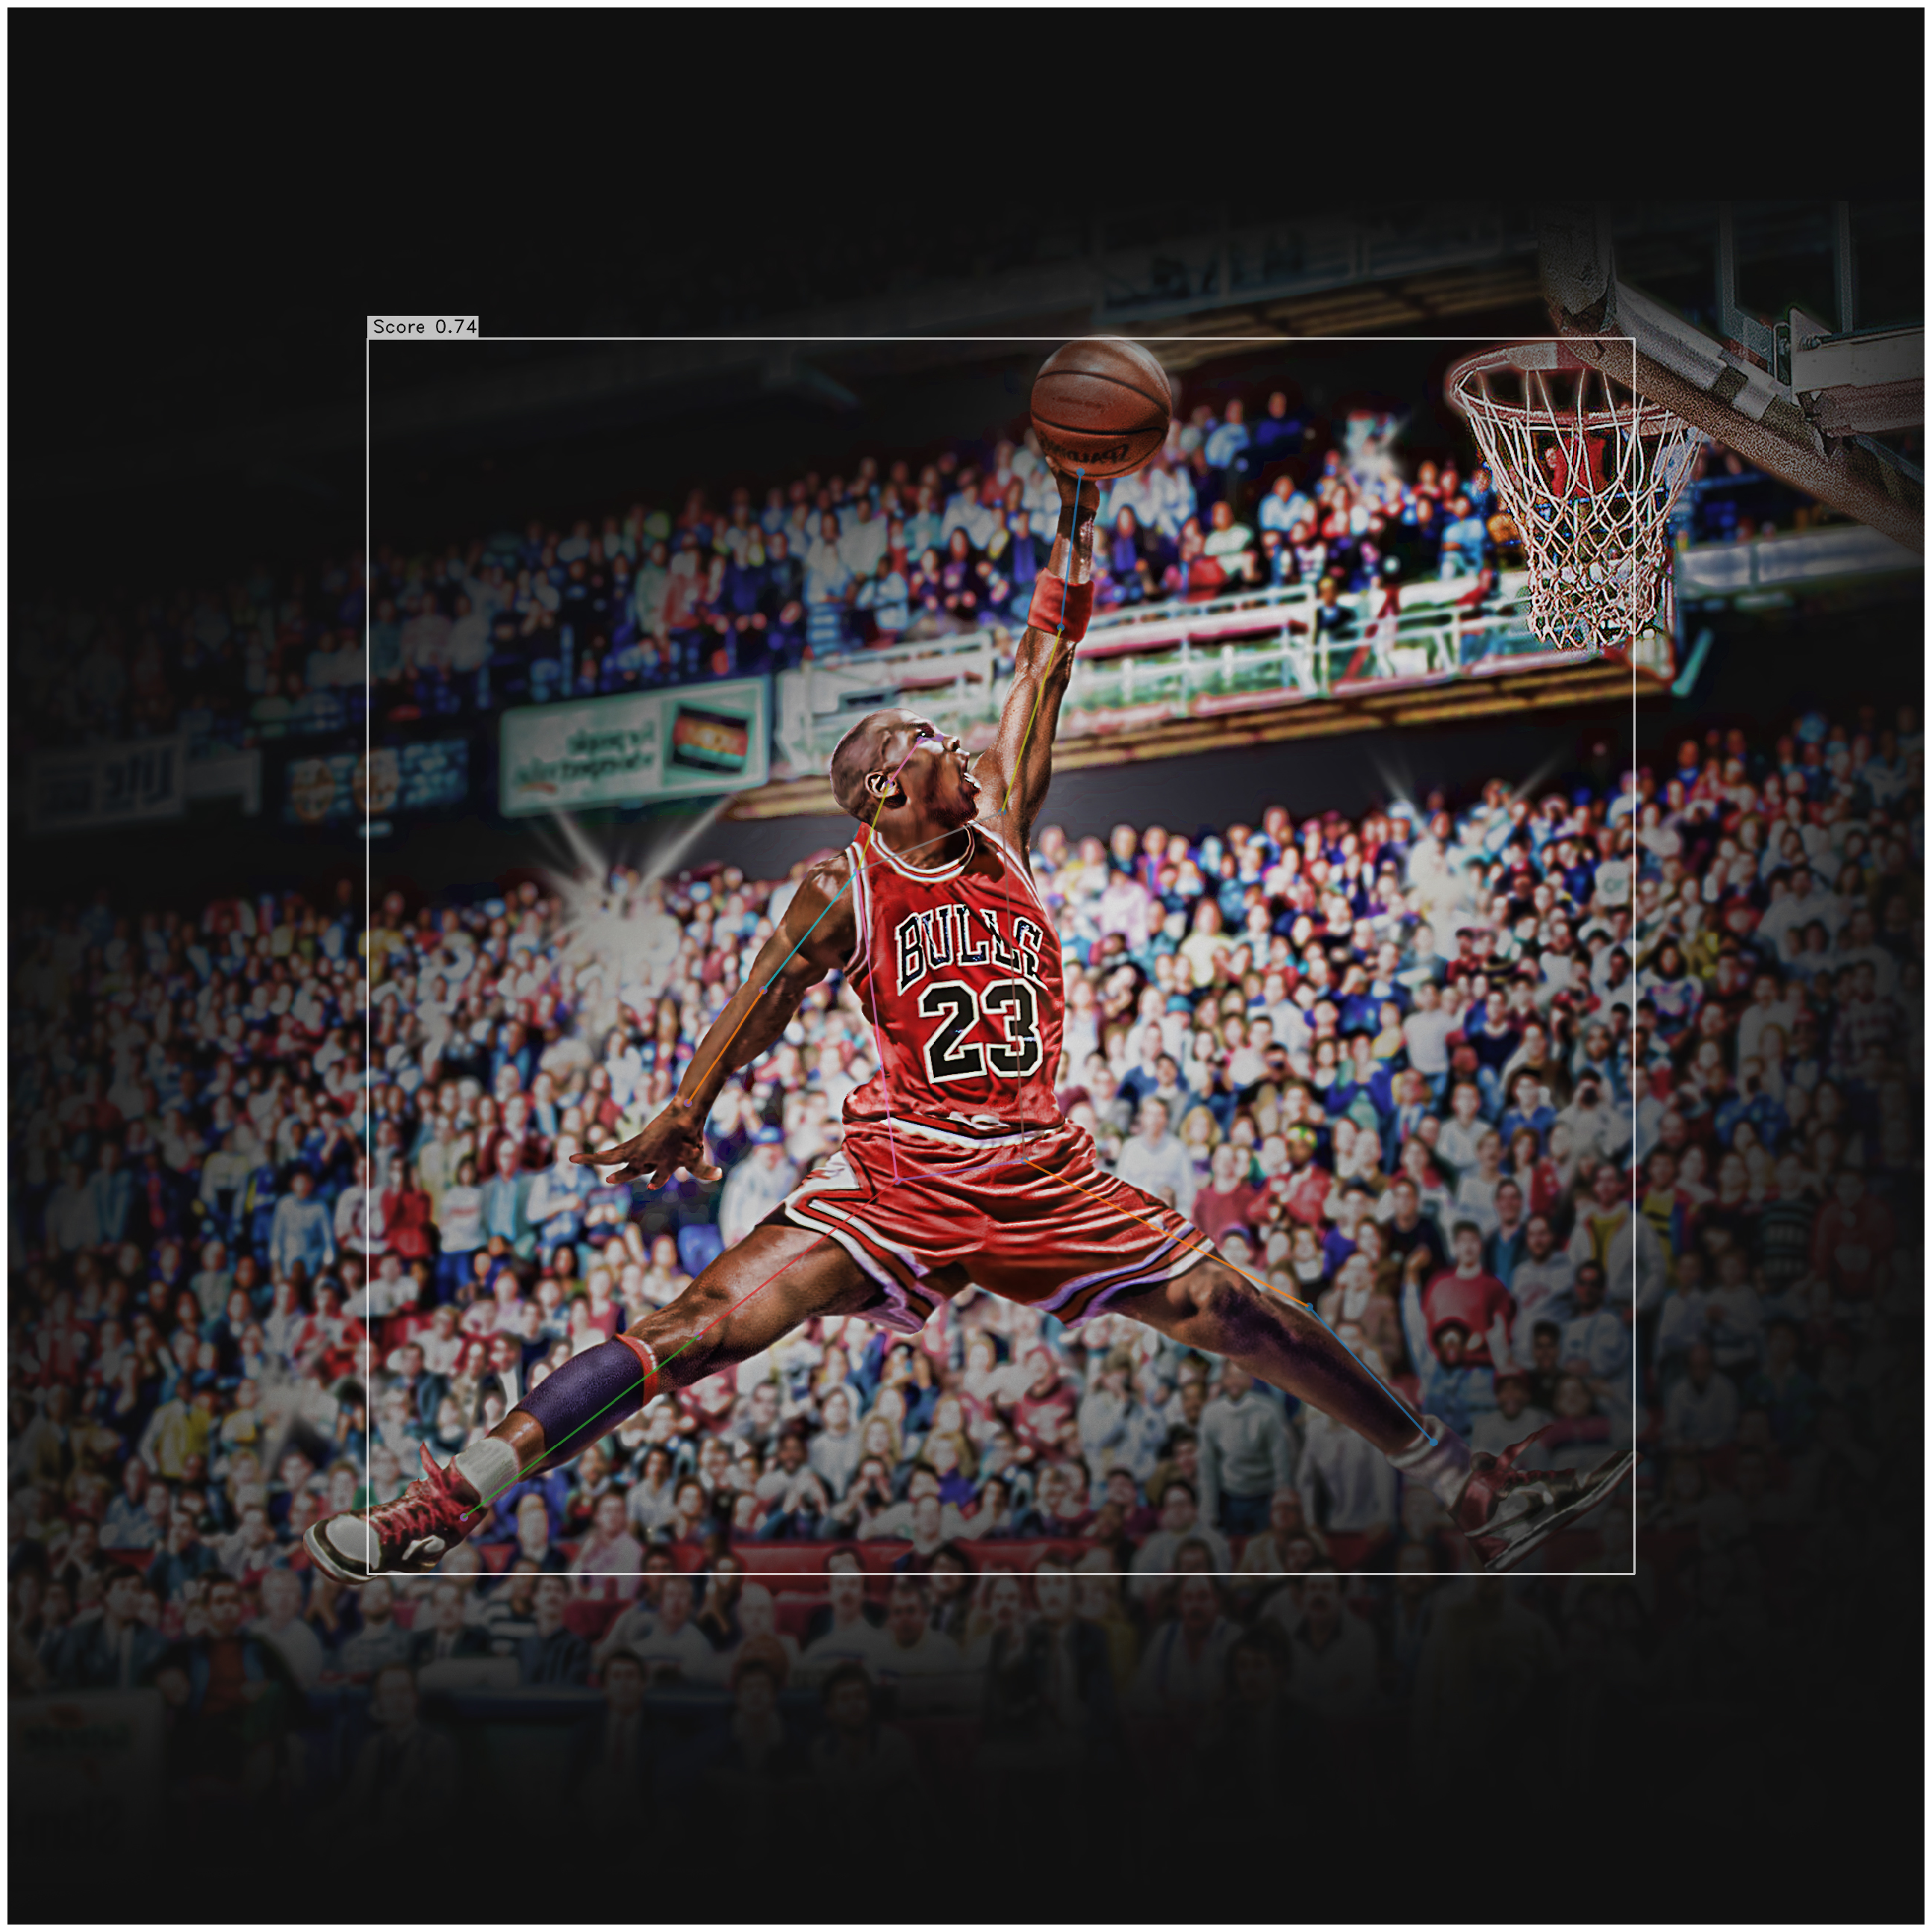

In [ ]:
model.predict(downloaded_files[0], conf=confidence).show()

In [ ]:
output_file = pathlib.Path(downloaded_files[1]).stem + "-detections" + pathlib.Path(downloaded_files[1]).suffix
model.predict(downloaded_files[1], conf=confidence).save(output_file)

[2023-11-06 09:59:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


In [ ]:
preds = model.predict(downloaded_files[2], conf=confidence)
print (preds)

[2023-11-06 10:00:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


ImagesPoseEstimationPrediction(_images_prediction_lst=[ImagePoseEstimationPrediction(image=array([[[  0,   0,   0],
        [158, 149, 132],
        [162, 173, 159],
        ...,
        [ 95,  65,  89],
        [ 97,  67,  91],
        [ 98,  66,  89]],

       [[  0,   0,   0],
        [134, 146, 136],
        [136, 151, 154],
        ...,
        [ 94,  65,  93],
        [ 93,  67,  94],
        [ 94,  68,  93]],

       [[118, 114, 128],
        [124, 136, 136],
        [184, 176, 197],
        ...,
        [ 96,  68,  93],
        [ 94,  68,  93],
        [ 93,  69,  91]],

       ...,

       [[161,   5,   6],
        [176,   5,  14],
        [180,   5,  10],
        ...,
        [ 22,  12,  11],
        [ 21,  11,  10],
        [ 21,  11,  10]],

       [[127,   7,   9],
        [146,   1,   6],
        [168,   4,  11],
        ...,
        [ 22,  10,  10],
        [ 21,   9,   9],
        [ 21,   9,   9]],

       [[ 88,   6,  12],
        [150,   7,  25],
        [183,   6,  3